In [35]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [36]:
# Lectura del DataFrame
df = pd.read_csv('C:/Users/danie/Downloads/EntregaFinal/Documents/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [38]:
# Variables de Estudio
X = df.drop('NObeyesdad', axis=1)
y = df[['NObeyesdad']]


In [39]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [40]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


<Axes: xlabel='Weight', ylabel='Height'>

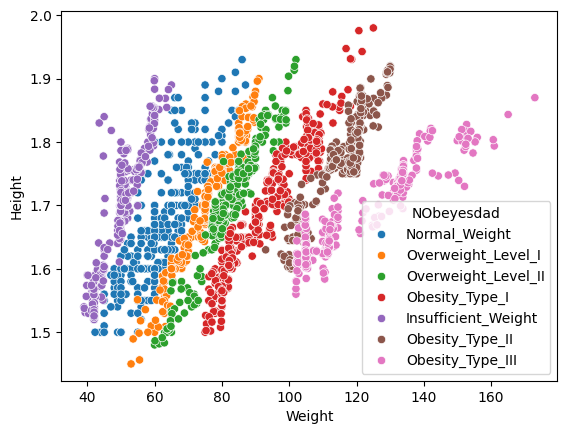

In [41]:
# Visualización Inicial de Scatter Bidimensional
sns.scatterplot(x=X['Weight'], y=X['Height'],hue=y['NObeyesdad'])


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copia del dataframe original para preprocesamiento
df_preprocessed = df.copy()

# 1. Codificación de variables categóricas con LabelEncoder
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le = LabelEncoder()
for col in label_cols:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# 2. Normalización de las columnas numéricas con StandardScaler
scaler = StandardScaler()
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

# Mostrar el dataframe preprocesado
df_preprocessed.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Copia del dataframe para normalización sin la columna 'NObeyesdad'
df_normalized = df_preprocessed.drop(columns=['NObeyesdad']).copy()

# Aplicar MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_normalized), columns=df_normalized.columns)

# Añadir de nuevo la columna de salida (NObeyesdad) para referencia
df_normalized['NObeyesdad'] = df_preprocessed['NObeyesdad']

# Mostrar las primeras filas del dataset normalizado
df_normalized.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.000000,0.5,1.000000,0.75,1
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75,1
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.75,1
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,1.00,5
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.666667,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75,6


In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copia del dataframe original para preprocesamiento
df_preprocessed = df.copy()

# 1. Codificación de variables categóricas con LabelEncoder
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le = LabelEncoder()
for col in label_cols:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])

# 2. Normalización de las columnas numéricas con StandardScaler
scaler = StandardScaler()
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

# Mostrar el dataframe preprocesado
df_preprocessed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


In [45]:
from sklearn.preprocessing import StandardScaler

# Copia del dataframe para estandarización sin la columna 'NObeyesdad'
df_standardized = df_preprocessed.drop(columns=['NObeyesdad']).copy()

# Aplicar StandardScaler
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_standardized), columns=df_standardized.columns)

# Añadir de nuevo la columna de salida (NObeyesdad) para referencia
df_standardized['NObeyesdad'] = df_preprocessed['NObeyesdad']

# Mostrar las primeras filas del dataset estandarizado
df_standardized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,1
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,1
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,1
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,5
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,6


In [46]:
from sklearn.decomposition import PCA

# Para identificar las componentes principales en el espacio original, obtenemos las cargas de cada característica
# de las componentes principales usando el PCA entrenado.

# Componentes principales del dataset normalizado (sin la columna de salida)
pca_full = PCA(n_components=df_normalized.shape[1] - 1)  # Ajuste para todas las componentes posibles
pca_full.fit(df_normalized.drop(columns=['NObeyesdad']))

# Obtener las componentes y cargarlas en un DataFrame para facilitar la interpretación
pca_components_df = pd.DataFrame(pca_full.components_, columns=df_normalized.columns[:-1])

# Mostrar las componentes principales
pca_components_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.884868,0.031765,0.232801,0.116886,0.237379,0.112975,-0.141288,0.064576,0.046119,0.011161,0.121978,-0.069673,0.123514,0.016665,-0.003753,-0.131774
1,-0.302807,0.086041,0.032768,0.267189,0.779736,0.347700,0.152398,0.037644,0.080638,-0.006274,0.134223,-0.119517,-0.159411,-0.024470,-0.027102,-0.096580
2,-0.027550,-0.234131,0.087246,0.059337,0.085765,-0.053033,0.083697,0.089268,-0.006031,-0.003401,0.380717,0.033805,0.260505,0.498099,-0.005914,0.667842
3,0.066911,-0.069665,-0.053092,-0.058255,-0.085652,0.529452,-0.298120,-0.164564,0.004367,-0.011217,-0.469400,-0.118559,-0.346369,0.438191,0.012765,0.184829
4,-0.036598,-0.002747,0.077942,0.089662,-0.470901,0.680938,0.196373,0.010535,0.065908,-0.036272,0.413375,-0.027158,0.086086,-0.233315,-0.143528,-0.026797
5,0.183690,-0.052721,-0.041259,0.121728,0.044783,-0.116877,0.072492,-0.367164,0.065339,-0.002458,0.010777,-0.032541,-0.422178,-0.533220,-0.045797,0.566677
6,-0.057192,0.059960,-0.148704,-0.140847,0.001980,-0.111275,-0.430059,-0.482693,0.100250,-0.025724,0.597212,0.015422,-0.232113,0.201517,0.034105,-0.239987
7,-0.049817,-0.010884,-0.027617,-0.069411,0.144746,0.157473,0.007838,-0.637401,0.045399,-0.013802,-0.214198,0.026372,0.665787,-0.119089,0.179721,0.033860
8,0.165308,0.064407,0.024601,0.109371,-0.095357,-0.107856,0.738356,-0.369367,-0.013566,0.048944,-0.038631,0.098475,-0.213964,0.385102,-0.041079,-0.209975
9,0.055932,-0.054291,-0.047761,-0.132931,0.141225,0.178643,-0.039694,0.047933,-0.097693,0.052074,-0.001255,0.946666,-0.081078,-0.053224,0.004687,0.019484


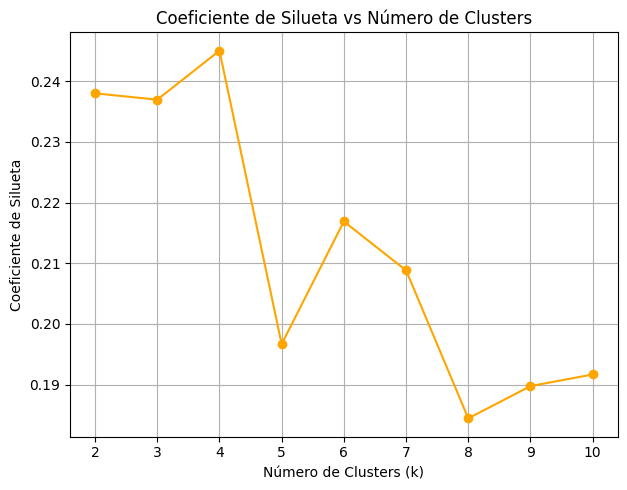

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Método del Codo y Coeficiente de Silueta para determinar el número óptimo de clusters
sse = []  # Suma de errores al cuadrado (SSE) para el método del codo
silhouette_scores = []  # Coeficiente de silueta para cada valor de k

# Rango de valores de k a probar
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

    # Calcular SSE (suma de errores al cuadrado)
    sse.append(kmeans.inertia_)

    # Calcular el coeficiente de silueta
    silhouette_scores.append(silhouette_score(df_normalized.drop(columns=['NObeyesdad']), kmeans_labels))
    # Graficar el método del codo
plt.figure(figsize=(12, 5))

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)

plt.tight_layout()
plt.show()

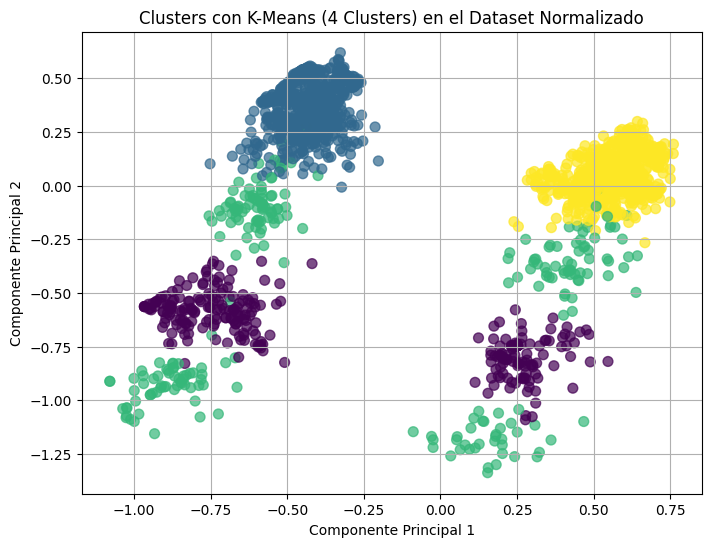

In [48]:
from sklearn.cluster import KMeans

# Aplicación de K-Means con un número específico de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

# Reducción de dimensionalidad con PCA para visualización
pca_kmeans = PCA(n_components=14)
df_pca_kmeans = pca_kmeans.fit_transform(df_normalized.drop(columns=['NObeyesdad']))

# Visualización de los clusters formados por K-Means en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_kmeans[:, 0], df_pca_kmeans[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters con K-Means (4 Clusters) en el Dataset Normalizado')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


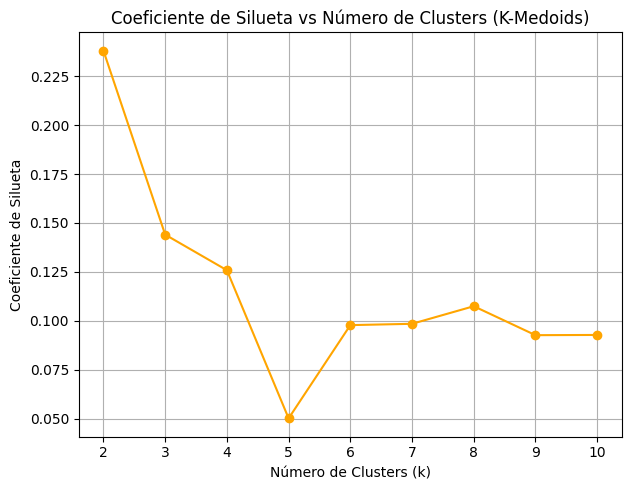

In [49]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definir listas para almacenar el SSE aproximado y el coeficiente de silueta
sse_kmedoids = []
silhouette_scores_kmedoids = []

# Rango de valores de k a probar
k_values = range(2, 11)

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
    kmedoids_labels = kmedoids.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

    # Aproximación de SSE como la suma de las distancias al medoid más cercano
    sse_k = sum(
        np.min(np.linalg.norm(df_normalized.drop(columns=['NObeyesdad']).values - kmedoids.cluster_centers_[i], axis=1))
        for i in range(k)
    )
    sse_kmedoids.append(sse_k)

    # Calcular el coeficiente de silueta
    silhouette_scores_kmedoids.append(silhouette_score(df_normalized.drop(columns=['NObeyesdad']), kmedoids_labels))
# Graficar el método del codo y el coeficiente de silueta
plt.figure(figsize=(12, 5))


# Silhouette Score con K-Medoids
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_kmedoids, marker='o', color='orange')
plt.title('Coeficiente de Silueta vs Número de Clusters (K-Medoids)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)

plt.tight_layout()
plt.show()

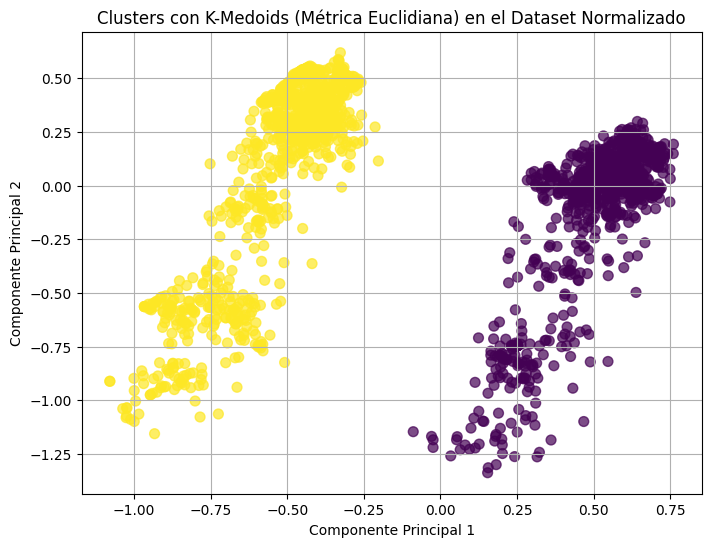

In [50]:
from sklearn_extra.cluster import KMedoids

# Aplicación de K-Medoids con la métrica euclidiana
kmedoids = KMedoids(n_clusters=2, metric='euclidean', random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

# Reducción de dimensionalidad con PCA para visualización
pca_kmedoids = PCA(n_components=2)
df_pca_kmedoids = pca_kmedoids.fit_transform(df_normalized.drop(columns=['NObeyesdad']))

# Visualización de los clusters formados por K-Medoids en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_kmedoids[:, 0], df_pca_kmedoids[:, 1], c=kmedoids_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters con K-Medoids (Métrica Euclidiana) en el Dataset Normalizado')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

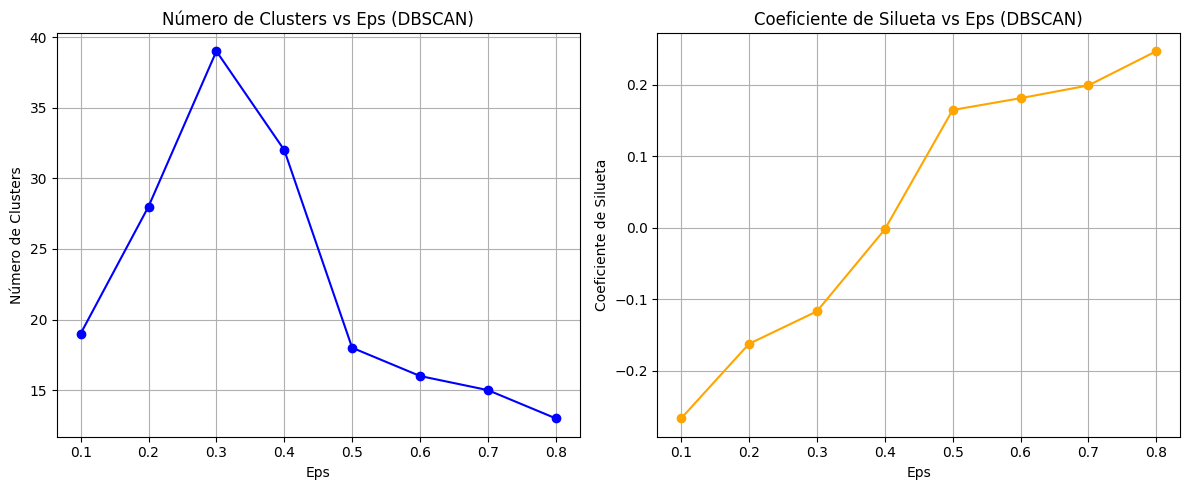

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Listas para almacenar el coeficiente de silueta y el número de clústeres encontrados para cada valor de eps
silhouette_scores_dbscan = []
n_clusters_dbscan = []

# Rango de valores de eps a probar
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='euclidean')
    labels_dbscan = dbscan.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

    # Contar el número de clusters encontrados (excluyendo ruido)
    n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    n_clusters_dbscan.append(n_clusters)

    # Calcular el coeficiente de silueta solo si hay más de un clúster
    if n_clusters > 1:
        silhouette = silhouette_score(df_normalized.drop(columns=['NObeyesdad']), labels_dbscan)
        silhouette_scores_dbscan.append(silhouette)
    else:
        silhouette_scores_dbscan.append(float('nan'))  # Asignar NaN si hay menos de 2 clusters

# Graficar el coeficiente de silueta y el número de clusters encontrados para cada valor de eps
plt.figure(figsize=(12, 5))

# Gráfico del número de clusters vs eps
plt.subplot(1, 2, 1)
plt.plot(eps_values, n_clusters_dbscan, marker='o', color='blue')
plt.title('Número de Clusters vs Eps (DBSCAN)')
plt.xlabel('Eps')
plt.ylabel('Número de Clusters')
plt.grid(True)

# Gráfico del coeficiente de silueta vs eps
plt.subplot(1, 2, 2)
plt.plot(eps_values, silhouette_scores_dbscan, marker='o', color='orange')
plt.title('Coeficiente de Silueta vs Eps (DBSCAN)')
plt.xlabel('Eps')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)

plt.tight_layout()
plt.show()

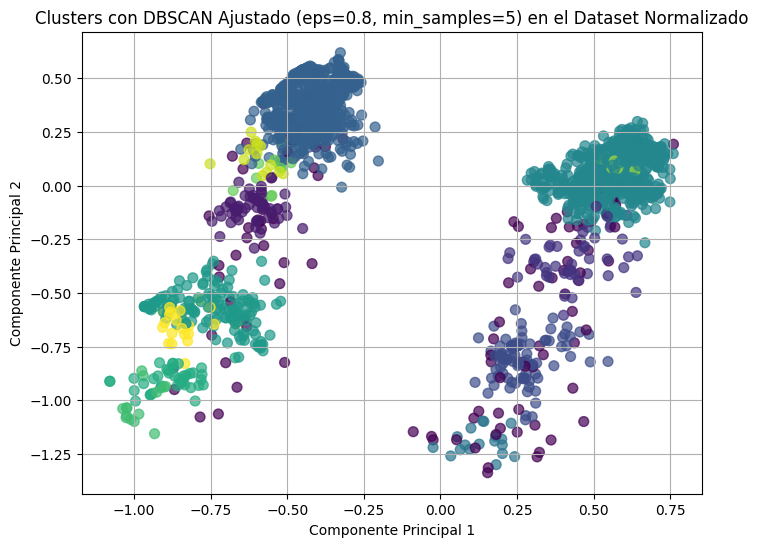

In [52]:
# Aplicación de DBSCAN ajustado en el dataset normalizado proporcionado
dbscan_adjusted = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan_labels_adjusted = dbscan_adjusted.fit_predict(df_normalized.drop(columns=['NObeyesdad']))

# Reducción de dimensionalidad con PCA para visualización
pca_adjusted = PCA(n_components=2)
df_pca_dbscan_adjusted = pca_adjusted.fit_transform(df_normalized.drop(columns=['NObeyesdad']))

# Visualización de los clusters formados por DBSCAN ajustado en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_dbscan_adjusted[:, 0], df_pca_dbscan_adjusted[:, 1], c=dbscan_labels_adjusted, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters con DBSCAN Ajustado (eps=0.8, min_samples=5) en el Dataset Normalizado')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [53]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Definir los pipelines de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [54]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])

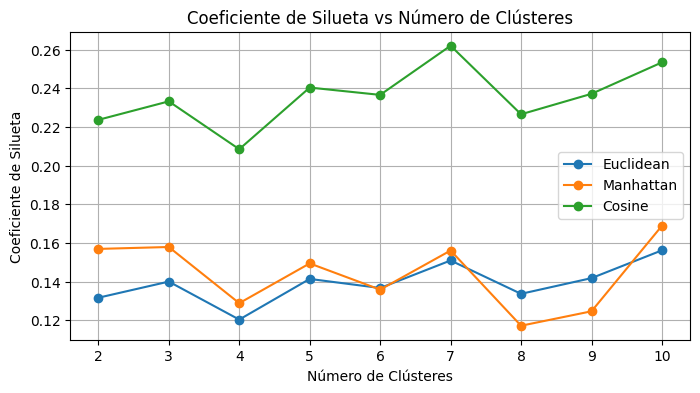

In [55]:
# Transformar el conjunto de datos completo
X_preprocessed = preprocessor.fit_transform(X)

# Lista de números de clústeres a evaluar
n_clusters_range = range(2, 11)
silhouette_scores = {'Euclidean': [], 'Manhattan': [], 'Cosine': []}

# Calcular el coeficiente de silueta para cada métrica y número de clústeres
for n_clusters in n_clusters_range:
    for metric in silhouette_scores.keys():
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_preprocessed)  # Usar el conjunto de datos preprocesado
        score = silhouette_score(X_preprocessed, labels, metric=metric.lower())  # Calcular silueta con la métrica
        silhouette_scores[metric].append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 4))
for metric, scores in silhouette_scores.items():
    plt.plot(n_clusters_range, scores, marker='o', label=metric)

plt.title('Coeficiente de Silueta vs Número de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.legend()
plt.grid(True)
plt.show()

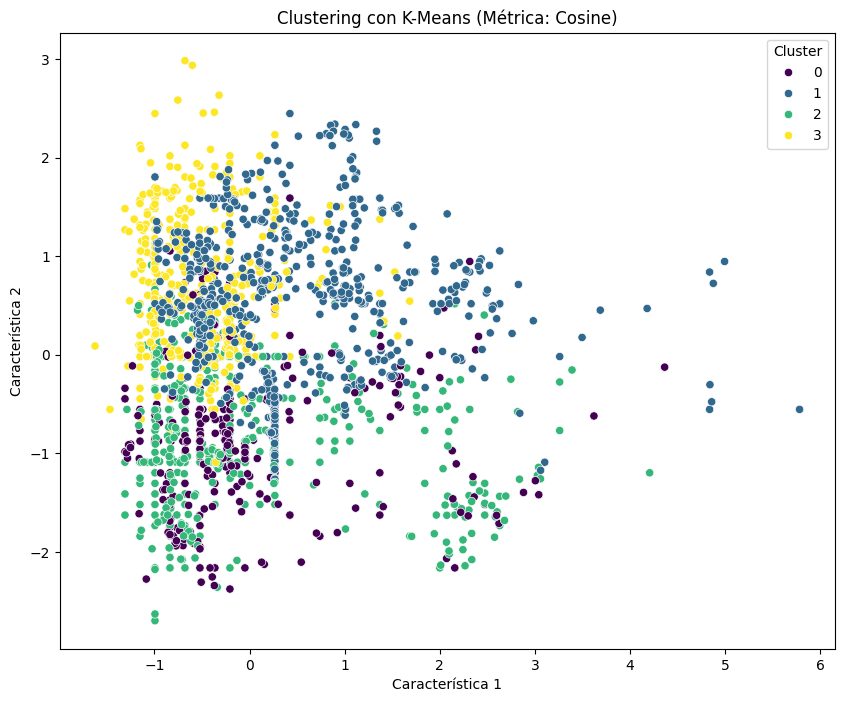

In [56]:
# Crear un modelo de KMeans con la métrica 'cosine'
kmeans_cosine = KMeans(n_clusters=4, random_state=42)  # Puedes ajustar el número de clústeres basado en tu análisis
kmeans_cosine.fit(X_preprocessed)

# Obtener las etiquetas de los clústeres
labels_cosine = kmeans_cosine.labels_

# Agregar las etiquetas de los clústeres al DataFrame preprocesado para la visualización
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())
X_preprocessed_df['Cluster'] = labels_cosine

# Graficar los clústeres
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_preprocessed_df.iloc[:, 0],  # Puedes elegir las características para graficar
    y=X_preprocessed_df.iloc[:, 1],
    hue='Cluster',
    palette='viridis',
    data=X_preprocessed_df,
    legend='full'
)
plt.title('Clustering con K-Means (Métrica: Cosine)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [57]:
# Crear el modelo de K-Medoids
kmedoids = KMedoids(n_clusters=4, metric='manhattan', random_state=42)  # Ajusta el número de clústeres según tu análisis

# Ajustar el modelo a los datos preprocesados
kmedoids.fit(X_preprocessed)

# Obtener las etiquetas de los clústeres
kmedoids_labels = kmedoids.labels_

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_preprocessed, kmedoids_labels, metric='manhattan')

# Imprimir el resultado
print(f"Coeficiente de Silueta para K-Medoids (4 clústeres): {silhouette_avg:.3f}")

Coeficiente de Silueta para K-Medoids (4 clústeres): 0.120


c:\Users\danie\anaconda3\envs\ProyectoFinal\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).
  warnings.warn(


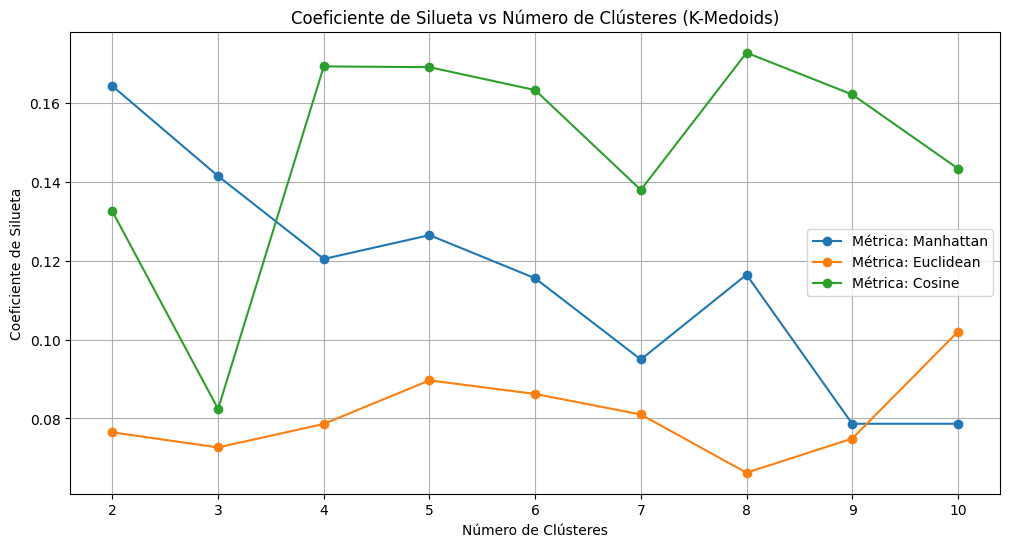

In [58]:
# Lista de números de clústeres a evaluar
n_clusters_range = range(2, 11)
metrics = ['manhattan', 'euclidean', 'cosine']
silhouette_scores = {metric: [] for metric in metrics}

# Calcular el coeficiente de silueta para cada número de clústeres y cada métrica
for metric in metrics:
    for n_clusters in n_clusters_range:
        kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)
        labels = kmedoids.fit_predict(X_preprocessed)  # Ajustar y predecir los clústeres
        score = silhouette_score(X_preprocessed, labels, metric=metric)
        silhouette_scores[metric].append(score)

# Graficar el coeficiente de silueta para cada métrica
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(n_clusters_range, silhouette_scores[metric], marker='o', linestyle='-', label=f'Métrica: {metric.capitalize()}')

plt.title('Coeficiente de Silueta vs Número de Clústeres (K-Medoids)')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.legend()
plt.grid(True)
plt.show()

Correlación con el IMC

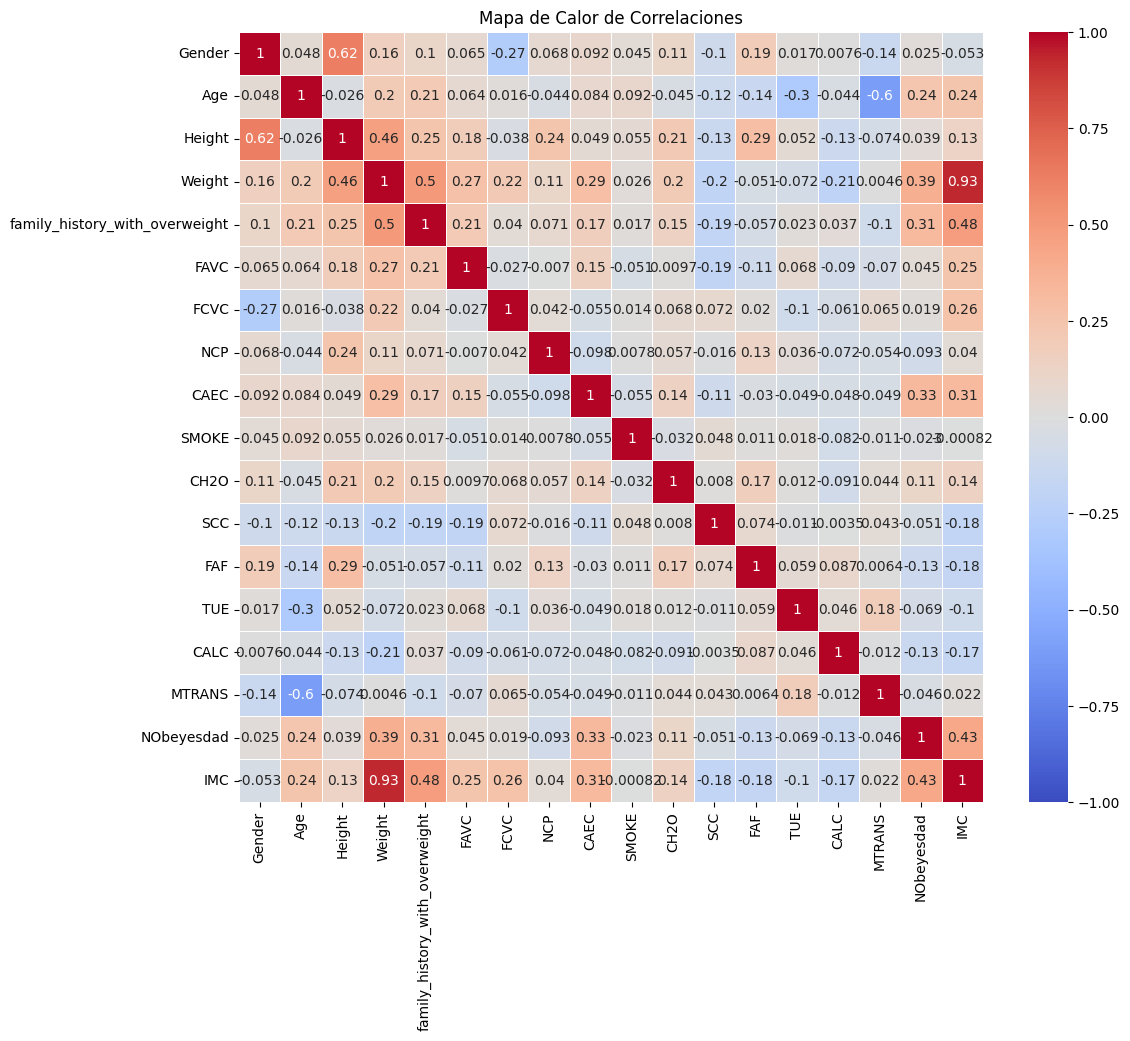

IMC                               1.000000
Weight                            0.934806
family_history_with_overweight    0.483508
NObeyesdad                        0.429686
CAEC                              0.313278
FCVC                              0.263651
FAVC                              0.246097
Age                               0.244163
CH2O                              0.144200
Height                            0.131785
NCP                               0.039969
MTRANS                            0.022061
SMOKE                            -0.000819
Gender                           -0.053035
TUE                              -0.099720
CALC                             -0.169805
FAF                              -0.177537
SCC                              -0.184286
Name: IMC, dtype: float64
Explained variance ratio for each PCA component:
[0.29827551 0.13978977 0.12605362 0.09407029 0.06606443 0.05889394
 0.05407553 0.05055372 0.03611726 0.02478308 0.01642303 0.01152568
 0.00767091 0.006

In [59]:
file_path = "C:/Users/danie/Downloads/EntregaFinal/Documents/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

# Calculate BMI (IMC) and add it as a new column
data['IMC'] = data['Weight'] / (data['Height'] ** 2)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize the numerical features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Apply PCA
pca = PCA(n_components=14)  # Increased to 14 components
pca_result = pca.fit_transform(data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(14)])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate correlation matrix
correlation_matrix = data.corr()

# Extract correlation of all variables with the IMC column
correlation_with_imc = correlation_matrix['IMC'].sort_values(ascending=False)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Display correlation with IMC
print(correlation_with_imc)

# Display explained variance for PCA
print("Explained variance ratio for each PCA component:")
print(explained_variance)

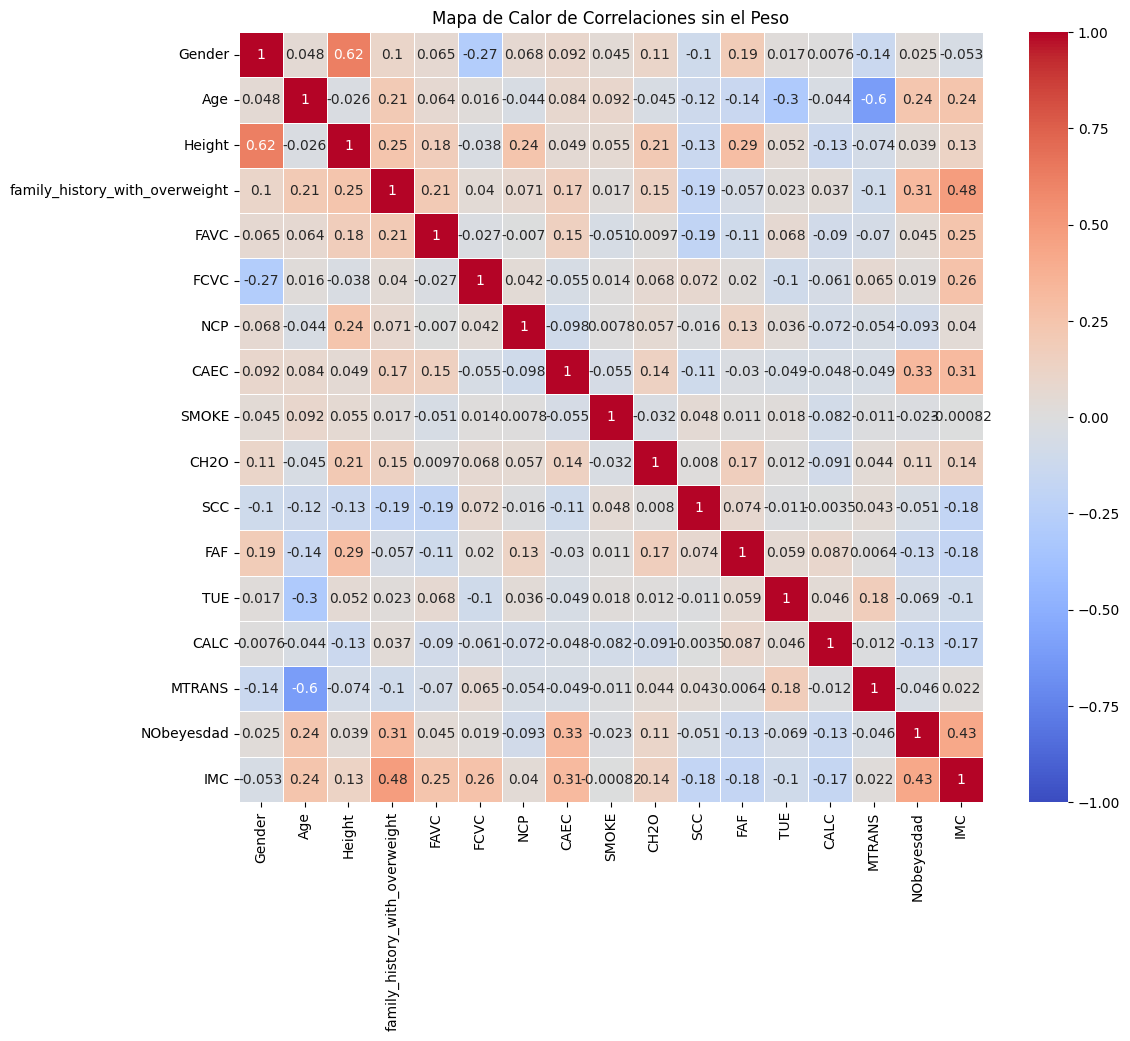

IMC                               1.000000
family_history_with_overweight    0.483508
NObeyesdad                        0.429686
CAEC                              0.313278
FCVC                              0.263651
FAVC                              0.246097
Age                               0.244163
CH2O                              0.144200
Height                            0.131785
NCP                               0.039969
MTRANS                            0.022061
SMOKE                            -0.000819
Gender                           -0.053035
TUE                              -0.099720
CALC                             -0.169805
FAF                              -0.177537
SCC                              -0.184286
Name: IMC, dtype: float64
Explained variance ratio for each PCA component:
[0.29603641 0.14896526 0.11545792 0.08862325 0.06639068 0.05901868
 0.05726833 0.05147093 0.03682574 0.02582588 0.01755041 0.01212701
 0.00817416 0.00646903]


In [60]:
# Load the uploaded data
file_path = "C:/Users/danie/Downloads/EntregaFinal/Documents/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

# Calculate BMI (IMC) and add it as a new column
data['IMC'] = data['Weight'] / (data['Height'] ** 2)

# Drop the 'Weight' column
data = data.drop(columns=['Weight'])

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize the numerical features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Apply PCA
pca = PCA(n_components=14)  # Increased to 14 components
pca_result = pca.fit_transform(data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(14)])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate correlation matrix
correlation_matrix = data.corr()

# Extract correlation of all variables with the IMC column
correlation_with_imc = correlation_matrix['IMC'].sort_values(ascending=False)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones sin el Peso')
plt.show()

# Display correlation with IMC
print(correlation_with_imc)

# Display explained variance for PCA
print("Explained variance ratio for each PCA component:")
print(explained_variance)

Creación del Modelo de tipo SVR para Predecir el IMC

In [61]:
Data = pd.read_csv(file_path)
# Agregar el IMC
Data['IMC'] = Data['Weight'] / (Data['Height'] ** 2)
X = Data.drop("IMC", axis=1)
y = Data['IMC']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Definir los pipelines de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convertir a formato denso
])

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir el pipeline completo con SVR como clasificador
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(C=1.0, kernel='rbf', gamma='scale'))
])

In [62]:
# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_pipeline.predict(X_test)

In [63]:
import joblib
filename="joblib_SVR.sav"
joblib.dump(model_pipeline,filename)

['joblib_SVR.sav']

In [64]:
# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.9211594767910463
Root Mean Squared Error (RMSE): 0.9597705334042331
Mean Absolute Error (MAE): 0.635943712395305
R-squared (R²): 0.9860549034299357


Creación del Modelo de tipo Random Forest para Predecir el IMC

In [65]:
Data = pd.read_csv(file_path)
# Agregar el IMC
Data['IMC'] = Data['Weight'] / (Data['Height'] ** 2)

# Dividir los datos en características (X) y objetivo (y)
X = Data.drop("IMC", axis=1)
y = Data['IMC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Definir los pipelines de preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir el pipeline completo con RandomForestRegressor
model_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [66]:
# Entrenar el modelo
model_pipeline1.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_pipeline1.predict(X_test)

In [68]:
import joblib
filename="joblib_RandomForest.sav"
joblib.dump(model_pipeline1,filename)

['joblib_RandomForest.sav']

In [67]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de validación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.2536323355968327
Root Mean Squared Error (RMSE): 0.5036192367223801
Mean Absolute Error (MAE): 0.3314342114177155
R-squared (R²): 0.9961603527919942
